In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [47]:
df=pd.read_csv("C:/Users/lenovo/Downloads/Health_insurance - Health_insurance.csv")

In [48]:
df.sample(20)

,age,sex,bmi,children,smoker,region,charges
192,25,male,25.74,0.0,no,southeast,2137.6536$
368,44,male,32.015,2.0,no,northwest,8116.26885$
1184,23,0,28.49,1.0,yes,southeast,18328.2381$
1411,34,female,26.885,0.0,no,southwest,12224.35085$
781,18,male,41.14,0.0,no,southeast,1146.7966$
864,51,male,25.4,0.0,no,southwest,8782.469$
943,19,male,22.61,0.0,no,northwest,1628.4709$
237,31,male,38.39,2.0,no,southeast,4463.2051$
248,19,male,20.9,1.0,no,southwest,1832.094$
301,53,female,22.61,3.0,yes,northeast,24873.3849$


# 1. Data Exploration and pre-processing -

##  Find the null values in different columns

In [49]:
df.isna().sum()

age          0
sex          0
bmi          1
children    21
smoker       0
region       0
charges      0
dtype: int64

In [50]:
df.shape

(1563, 7)

In [51]:
(df.isna().mean())*100

age         0.00000
sex         0.00000
bmi         0.06398
children    1.34357
smoker      0.00000
region      0.00000
charges     0.00000
dtype: float64

In [52]:
df.dtypes

age          object
sex          object
bmi          object
children    float64
smoker       object
region       object
charges      object
dtype: object

## Handle the missing values and noise value 

In [53]:
df.dropna(inplace=True)

In [54]:
for i in df.columns:
    print(df[i].unique(),'\n')

['19' '18' '28' '33' '32' '31' '46' '37' '60' '25' '62' '23' '56' '27'
 '52' '30' '34' '59' '63' '55' '22' '26' '35' '24' '41' '38' '36' '21'
 '48' '40' '58' '53' '43' '64' '20' '61' '44' '57' '29' '45' '54' '49'
 '47' '51' '42' '50' '39' '" "'] 

['female' 'male' '0' '%'] 

['27.9' '33.77' '33' '22.705' '28.88' '25.74' '33.44' '27.74' '29.83'
 '25.84' '26.22' '26.29' '34.4' '39.82' '42.13' '24.6' '30.78' '23.845'
 '40.3' '35.3' '36.005' '32.4' '34.1' '31.92' '28.025' '27.72' '23.085'
 '32.775' '17.385' '36.3' '35.6' '26.315' '28.6' '28.31' '36.4' '20.425'
 '32.965' '20.8' '36.67' '39.9' '26.6' '36.63' '21.78' '30.8' '37.05'
 '37.3' '38.665' '34.77' '24.53' '35.2' '35.625' '33.63' '28' '34.43'
 '28.69' '36.955' '31.825' '31.68' '22.88' '37.335' '27.36' '33.66' '24.7'
 '25.935' '22.42' '28.9' '39.1' '36.19' '23.98' '24.75' '28.5' '28.1'
 '32.01' '27.4' '34.01' '29.59' '35.53' '39.805' '26.885' '38.285' '37.62'
 '41.23' '34.8' '22.895' '31.16' '27.2' '26.98' '39.49' '24.795' '31.3'
 '38.

In [55]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
df=df.loc[~df['age'].isin(['","'])]

In [57]:
df=df.loc[~df['sex'].isin(['0','%'])]

In [58]:
df=df.loc[~df['bmi'].isin(['0','%'])]

In [59]:
df=df.loc[~df['smoker'].isin(['-','0'])]

In [60]:
df=df.loc[~df['region'].isin(['-'])]

In [61]:
for i in df.columns:
    print(df[i].unique(),'\n')

['19' '18' '28' '33' '32' '31' '46' '37' '60' '25' '62' '23' '56' '27'
 '52' '30' '34' '59' '63' '55' '22' '26' '35' '24' '41' '38' '36' '21'
 '48' '40' '58' '53' '43' '64' '20' '61' '44' '57' '29' '45' '54' '49'
 '47' '51' '42' '50' '39' '" "'] 

['female' 'male'] 

['27.9' '33.77' '33' '22.705' '28.88' '25.74' '33.44' '27.74' '29.83'
 '25.84' '26.22' '26.29' '34.4' '39.82' '42.13' '24.6' '30.78' '23.845'
 '40.3' '35.3' '36.005' '32.4' '34.1' '31.92' '28.025' '27.72' '23.085'
 '32.775' '17.385' '36.3' '35.6' '26.315' '28.6' '28.31' '36.4' '20.425'
 '32.965' '20.8' '36.67' '39.9' '26.6' '36.63' '21.78' '30.8' '37.05'
 '37.3' '38.665' '34.77' '24.53' '35.2' '35.625' '33.63' '28' '34.43'
 '28.69' '36.955' '31.825' '31.68' '22.88' '37.335' '27.36' '33.66' '24.7'
 '25.935' '22.42' '28.9' '39.1' '36.19' '23.98' '24.75' '28.5' '28.1'
 '32.01' '27.4' '34.01' '29.59' '35.53' '39.805' '26.885' '38.285' '37.62'
 '41.23' '34.8' '22.895' '31.16' '27.2' '26.98' '39.49' '24.795' '31.3'
 '38.28' '19.

## Check the data types of each column

In [62]:
df.dtypes

age          object
sex          object
bmi          object
children    float64
smoker       object
region       object
charges      object
dtype: object

## Find the statistical summary of the numerical columns (eg. Age, BMI,Children, Charges)


In [63]:
df['charges']=df['charges'].str.replace('$','')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5448\3983856881.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['charges']=df['charges'].str.replace('$','')


In [64]:
df['charges']=df['charges'].str.replace('-','')

In [65]:
df['charges']

0         16884.924
1         1725.5523
2          4449.462
3       21984.47061
4         3866.8552
           ...     
1537     2362.22905
1538     2352.96845
1539       3577.999
1540     3201.24515
1541    29186.48236
Name: charges, Length: 1534, dtype: object

In [66]:
df=df.loc[~df['region'].isin(['" "'])]

In [67]:
df=df.loc[~df['age'].isin(['" "'])]

In [68]:
df['age']=df['age'].astype(int)

In [69]:
df['bmi']=df['bmi'].astype(float)

In [70]:
df['children']=df['children'].astype(int)

In [71]:
df['charges']=pd.to_numeric(df['charges'],errors='coerce')

In [72]:
df.dropna(inplace=True)

In [73]:
df.dtypes

age           int32
sex          object
bmi         float64
children      int32
smoker       object
region       object
charges     float64
dtype: object

In [74]:
df.shape

(1522, 7)

## Statistical Summary

In [75]:
df.describe()

,age,bmi,children,charges
count,1522.000000,1522.000000,1522.000000,1522.000000
mean,39.086728,30.744389,1.099212,13240.766434
std,14.169829,6.046010,1.203769,12100.961797
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.400000,0.000000,4763.252250
50%,39.000000,30.495000,1.000000,9283.021300
75%,51.000000,34.800000,2.000000,16454.504562
max,64.000000,53.130000,5.000000,63770.428010


##  Find the different unique values in each categorical column

In [76]:
for i in df.columns:
    print(df[i].unique(),'\n')

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 

['female' 'male'] 

[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.

# Treat the outlier

In [77]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [78]:
col=['age','bmi','children','charges']

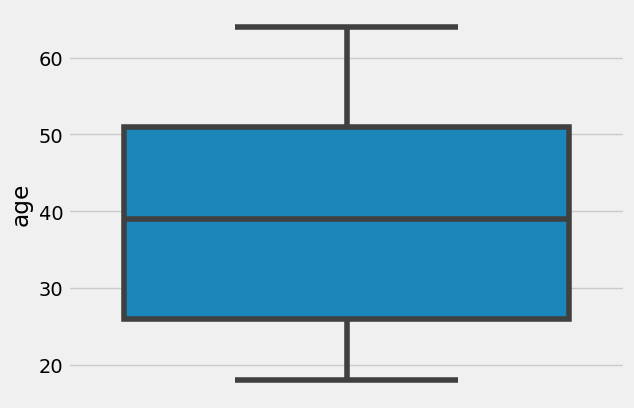

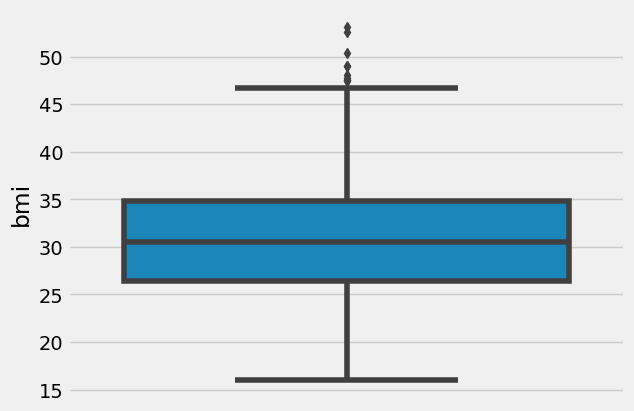

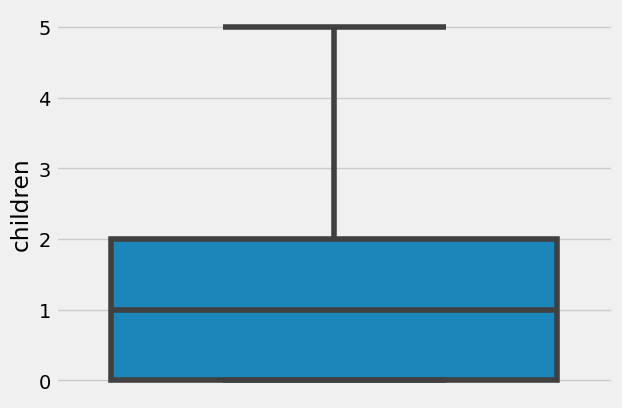

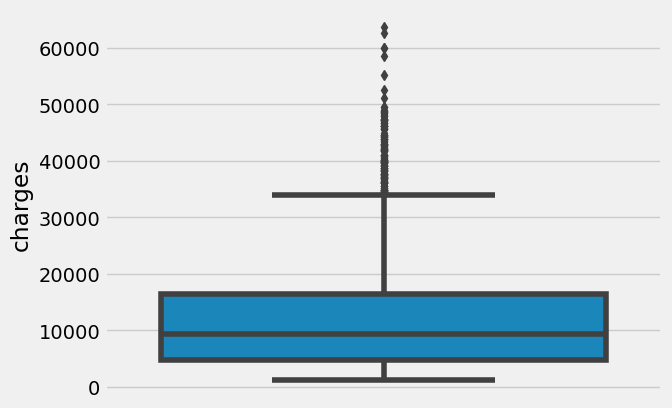

In [79]:
for e in col:
     plt.figure()
     sns.boxplot(y=e, data=df)
    

In [80]:
  percentile125=df['age'].quantile(0.25)

In [81]:
  percentile125=df['bmi'].quantile(0.25)

In [82]:
  percentile125=df['children'].quantile(0.25)

In [83]:
  percentile125=df['charges'].quantile(0.25)

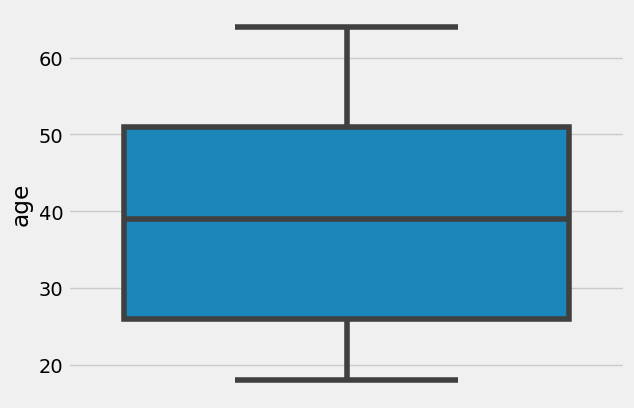

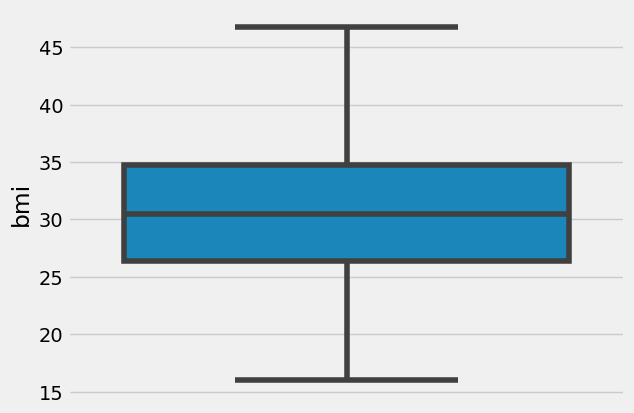

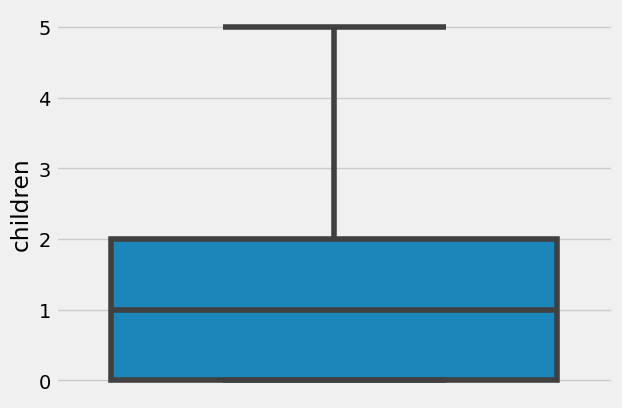

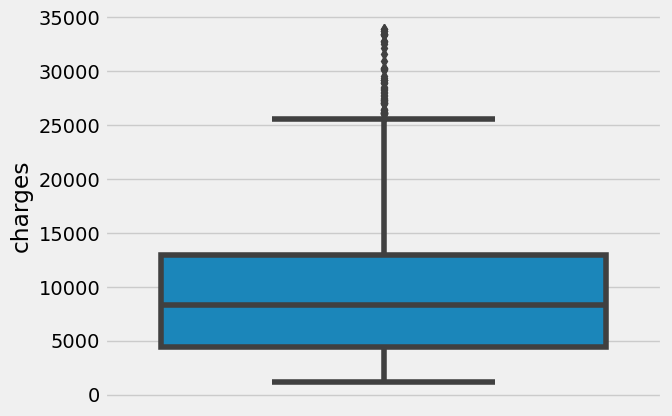

In [84]:
for e in col:
  percentile25=df[e].quantile(0.25)
  percentile75=df[e].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[df[e]<=upper_limit]
  df=df[df[e]>=lower_limit]
  plt.figure()
  sns.boxplot(y=e, data=df)

## Apply the encoding on categorical columns

In [85]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [87]:
le=LabelEncoder()

In [88]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [89]:
col1=['smoker','sex']

In [90]:
for c in col1:
  df[c]=le.fit_transform(df[c])

In [91]:
df2=pd.get_dummies(df,columns=['region'],drop_first=True)

In [92]:
df2.dtypes

age                   int32
sex                   int32
bmi                 float64
children              int32
smoker                int32
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [93]:
df2.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [94]:
df2

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1537,55,1,46.530,0,0,2362.22905,0,0,0
1538,43,0,23.980,1,1,2352.96845,1,0,0
1539,43,0,31.540,2,0,3577.99900,0,0,1
1540,22,1,33.660,0,0,3201.24515,1,0,0


## Apply the scaling on numerical columns

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
sc=MinMaxScaler()

In [108]:
sc.fit(x_train)

MinMaxScaler()

In [109]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [110]:
x_train.shape

(1081, 8)

In [111]:
x_test.shape

(271, 8)

# 2. Training the model -

# Split the data for training and testing

In [101]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [102]:
x=df2[['age', 'sex', 'bmi', 'children', 'smoker',
       'region_northwest', 'region_southeast', 'region_southwest']]

In [103]:
y=df['charges']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [106]:
x_train.shape

(1081, 8)

In [107]:
y_train.shape

(1081,)

## Train the linear regression model with the help of all given columns

In [112]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [113]:
reg.fit(x_train, y_train)

LinearRegression()

## Determine the training accuracy

In [114]:
y_pred=reg.predict(x_test)

In [119]:
y_pred1=reg.predict(x_train)

In [115]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

25150377.79702838

In [116]:
np.sqrt(mean_squared_error(y_test, y_pred))

5015.015233977698

In [120]:
r2_score(y_train, y_pred1)

0.4177711907076075

# Determine the testing accuracy  

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4940352356026234

# Determine the coefficient and intercept of the model

In [123]:
reg.intercept_

3977.6765451447336

In [124]:
reg.coef_

array([ 9479.76160544,  -306.71346322,  1107.17576375,  2071.83552878,
       10899.55925579,  -478.26228076,  -840.74639379, -1189.3886268 ])